In [60]:
import polars as pl
import os
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [61]:
city = "Stadt_Heidelberg"

files = os.listdir(f'../../data/processed/cycle_counter/{city}/')

In [62]:
# open all files print, and print the first 5 rows of each file

#this is hacked as python packages seem to be np-hard...
counter_scheme = {
        "operator_name": pl.String,
        "domain_name": pl.String,
        "domain_id": pl.Int32,
        "counter_site": pl.String,
        "counter_site_id": pl.Int32,
        "counter_serial": pl.String,
        "longitude": pl.Float64,
        "latitude": pl.Float64,
        "timezone": pl.String,
        "iso_timestamp": pl.String,
        "channels_in": pl.Int32,
        "channels_out": pl.Int32,
        "channels_all": pl.Int32,
        "channels_unknown": pl.Int32,
        "site_temperature": pl.Float64,
        "site_rain_accumulation": pl.Float64,
        "site_snow_accumulation": pl.Float64,
    }

frames = [pl.read_csv(f'../../data/processed/cycle_counter/{city}/{file}', schema=counter_scheme) for file in files]
for i, frame in enumerate(frames[:3]):
    display(frame.head(1))

operator_name,domain_name,domain_id,counter_site,counter_site_id,counter_serial,longitude,latitude,timezone,iso_timestamp,channels_in,channels_out,channels_all,channels_unknown,site_temperature,site_rain_accumulation,site_snow_accumulation
str,str,i32,str,i32,str,f64,f64,str,str,i32,i32,i32,i32,f64,f64,f64
"""Eco Counter GmbH""","""Stadt Heidelberg""",4206,"""Eppelheimer Str. Querschnitt""",100059187,"""Y2H15027363""",8.64976,49.404708,"""(UTC+01:00) Europe/Paris DST""","""2021-05-01T00:00:00+02:00""",0,2,2,2,10.0,0.0,null


operator_name,domain_name,domain_id,counter_site,counter_site_id,counter_serial,longitude,latitude,timezone,iso_timestamp,channels_in,channels_out,channels_all,channels_unknown,site_temperature,site_rain_accumulation,site_snow_accumulation
str,str,i32,str,i32,str,f64,f64,str,str,i32,i32,i32,i32,f64,f64,f64
"""Eco Counter GmbH""","""Stadt Heidelberg""",4206,"""Ernst-Walz-Brücke Querschnitt""",100048811,"""Y2H17082923""",8.676711,49.409534,"""(UTC+01:00) Europe/Paris DST""","""2018-07-01T00:00:00+02:00""",42,5,47,47,19.0,0.0,null


operator_name,domain_name,domain_id,counter_site,counter_site_id,counter_serial,longitude,latitude,timezone,iso_timestamp,channels_in,channels_out,channels_all,channels_unknown,site_temperature,site_rain_accumulation,site_snow_accumulation
str,str,i32,str,i32,str,f64,f64,str,str,i32,i32,i32,i32,f64,f64,f64
"""Eco Counter GmbH""","""Stadt Heidelberg""",4206,"""Gaisbergstraße""",100012608,"""YTH15078127""",8.69424,49.406723,"""(UTC+01:00) Europe/Paris DST""","""2018-07-01T00:00:00+02:00""",63,36,99,99,19.0,0.0,null


In [63]:
#check if the columns have the same schema and print the conflicting columns
for i in range(1, len(frames)):
    if frames[0].schema != frames[i].schema:
        print(f"Schema mismatch between frames[0] and frames[{i}]")
        display(frames[0].schema)
        display(frames[i].schema)

In [64]:
# get the average lat and lon of all stations
avg = pl.concat(frames).select(['latitude', 'longitude']).mean().to_numpy()[0].tolist()

print(avg)

# # get the position of each station in the first file and plot them on a map
# m = folium.Map(location=avg, zoom_start=13)
# for frame in frames:
#     folium.Marker(
#         location=[frame.row(0, named=True)['latitude'], frame.row(0, named=True)['longitude']],
#         popup=frame.row(0, named=True)['counter_site'],
#     ).add_to(m)

#m

[49.40732249729942, 8.684253176300667]


In [65]:
# sum by day per station
dailys = []
for frame in frames:
    df_daily = frame.with_columns([
        pl.col('iso_timestamp').str.strptime(pl.Datetime, format="%Y-%m-%dT%H:%M:%S%z").dt.date().alias('date')
    ]).group_by(['counter_site_id', 'date', 'counter_site', 'latitude', 'longitude']).agg([
        pl.sum('channels_in').alias('channels_in_daily'),
        pl.sum('channels_out').alias('channels_out_daily'),
        pl.sum('channels_all').alias('channels_all_daily'),
    ]).sort(['counter_site_id', 'date'])
    dailys.append(df_daily)

In [66]:
for daily in dailys[:3]:
    display(daily.head(1))

counter_site_id,date,counter_site,latitude,longitude,channels_in_daily,channels_out_daily,channels_all_daily
i32,date,str,f64,f64,i32,i32,i32
100059187,2020-01-31,"""Eppelheimer Str. Querschnitt""",49.404708,8.64976,6,13,19


counter_site_id,date,counter_site,latitude,longitude,channels_in_daily,channels_out_daily,channels_all_daily
i32,date,str,f64,f64,i32,i32,i32
100048811,2014-05-31,"""Ernst-Walz-Brücke Querschnitt""",49.409534,8.676711,63,16,79


counter_site_id,date,counter_site,latitude,longitude,channels_in_daily,channels_out_daily,channels_all_daily
i32,date,str,f64,f64,i32,i32,i32
100012608,2015-10-31,"""Gaisbergstraße""",49.406723,8.69424,58,25,83


In [67]:
# now we want to see if there is any difference between the channels_in_daily and channels_out_daily, we create a new column 'daily_difference'
for idx, daily in enumerate(dailys):
    dailys[idx] = daily.with_columns(
        (pl.col('channels_in_daily') - pl.col('channels_out_daily')).alias('daily_diff')
    )

In [68]:
for i, daily in enumerate(dailys[:3]):
    display(daily.head(3))

counter_site_id,date,counter_site,latitude,longitude,channels_in_daily,channels_out_daily,channels_all_daily,daily_diff
i32,date,str,f64,f64,i32,i32,i32,i32
100059187,2020-01-31,"""Eppelheimer Str. Querschnitt""",49.404708,8.64976,6,13,19,-7
100059187,2020-02-01,"""Eppelheimer Str. Querschnitt""",49.404708,8.64976,177,170,347,7
100059187,2020-02-02,"""Eppelheimer Str. Querschnitt""",49.404708,8.64976,111,138,249,-27


counter_site_id,date,counter_site,latitude,longitude,channels_in_daily,channels_out_daily,channels_all_daily,daily_diff
i32,date,str,f64,f64,i32,i32,i32,i32
100048811,2014-05-31,"""Ernst-Walz-Brücke Querschnitt""",49.409534,8.676711,63,16,79,47
100048811,2014-06-01,"""Ernst-Walz-Brücke Querschnitt""",49.409534,8.676711,1630,411,2041,1219
100048811,2014-06-02,"""Ernst-Walz-Brücke Querschnitt""",49.409534,8.676711,5017,1328,6345,3689


counter_site_id,date,counter_site,latitude,longitude,channels_in_daily,channels_out_daily,channels_all_daily,daily_diff
i32,date,str,f64,f64,i32,i32,i32,i32
100012608,2015-10-31,"""Gaisbergstraße""",49.406723,8.69424,58,25,83,33
100012608,2015-11-01,"""Gaisbergstraße""",49.406723,8.69424,799,983,1782,-184
100012608,2015-11-02,"""Gaisbergstraße""",49.406723,8.69424,1681,2320,4001,-639


In [69]:
def print_series(data, start_date, end_date, station_name):
    # plot the time series as a smooth curve (show raw in light alpha + moving average)
    n = len(data)
    x = np.arange(n)

    # smoothing window: 24 hours if available, otherwise a small window
    window = 24 if n >= 24 else max(3, n // 10)
    smoothed = np.convolve(data, np.ones(window) / window, mode='same')

    plt.figure(figsize=(25, 5))
    plt.plot(x, data, color='gray', alpha=0.25, linewidth=0.5, label='raw')
    plt.plot(x, smoothed, color='tab:blue', linewidth=1.5, label=f'{window}-hour MA')
    # show only start and end on x-axis (positions 0 and last index)
    plt.xticks([0, max(n - 1, 0)], [start_date, end_date])
    plt.title(f'Cycle Counter Data for {station_name}\nfrom {start_date} to {end_date}')
    plt.xlabel('Hours since ' + start_date)
    plt.ylabel('Cycle Counts (All Channels)')
    plt.legend()
    plt.show()

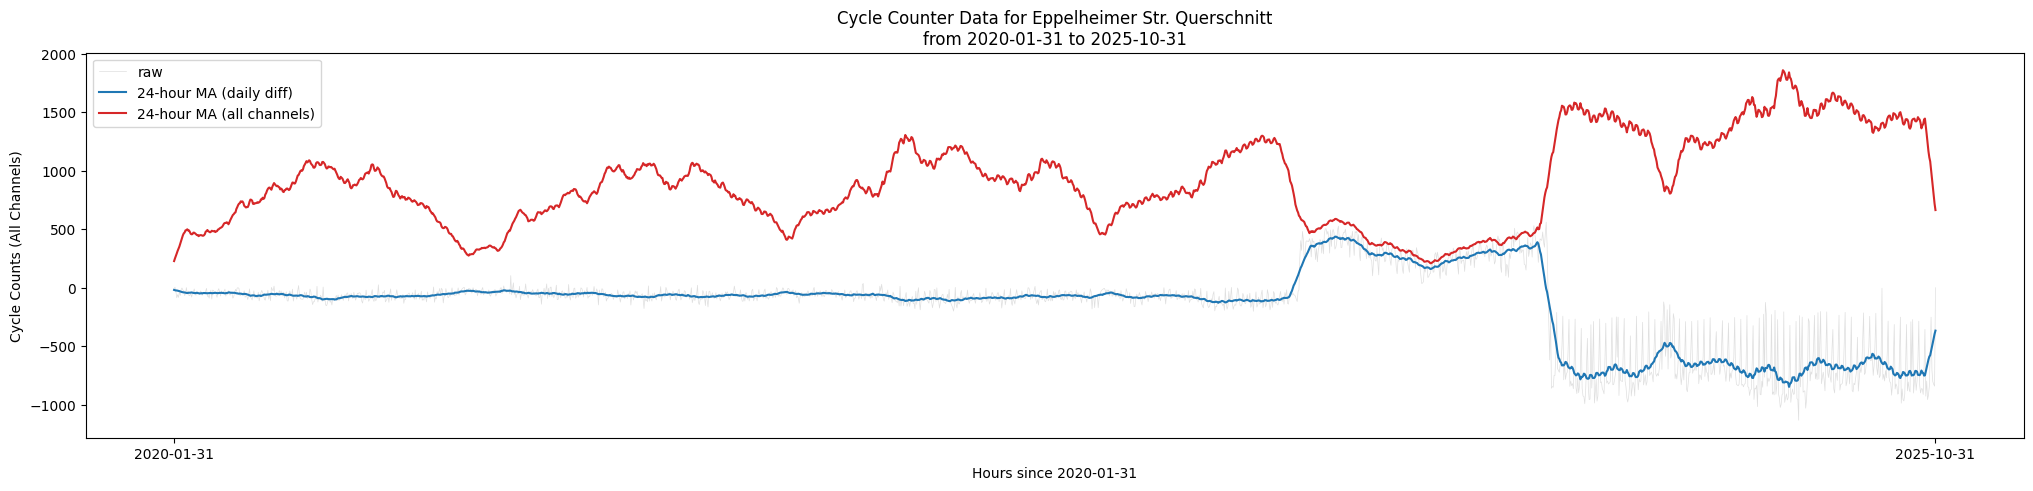

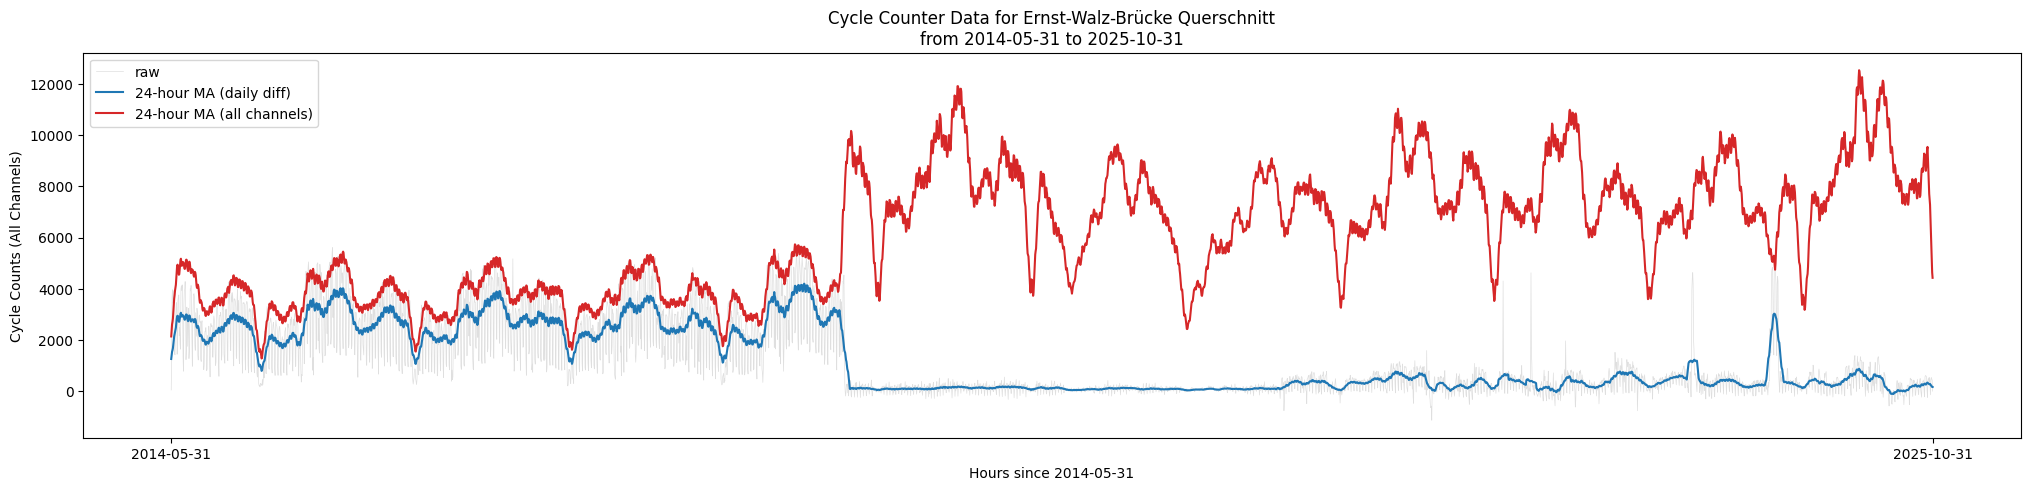

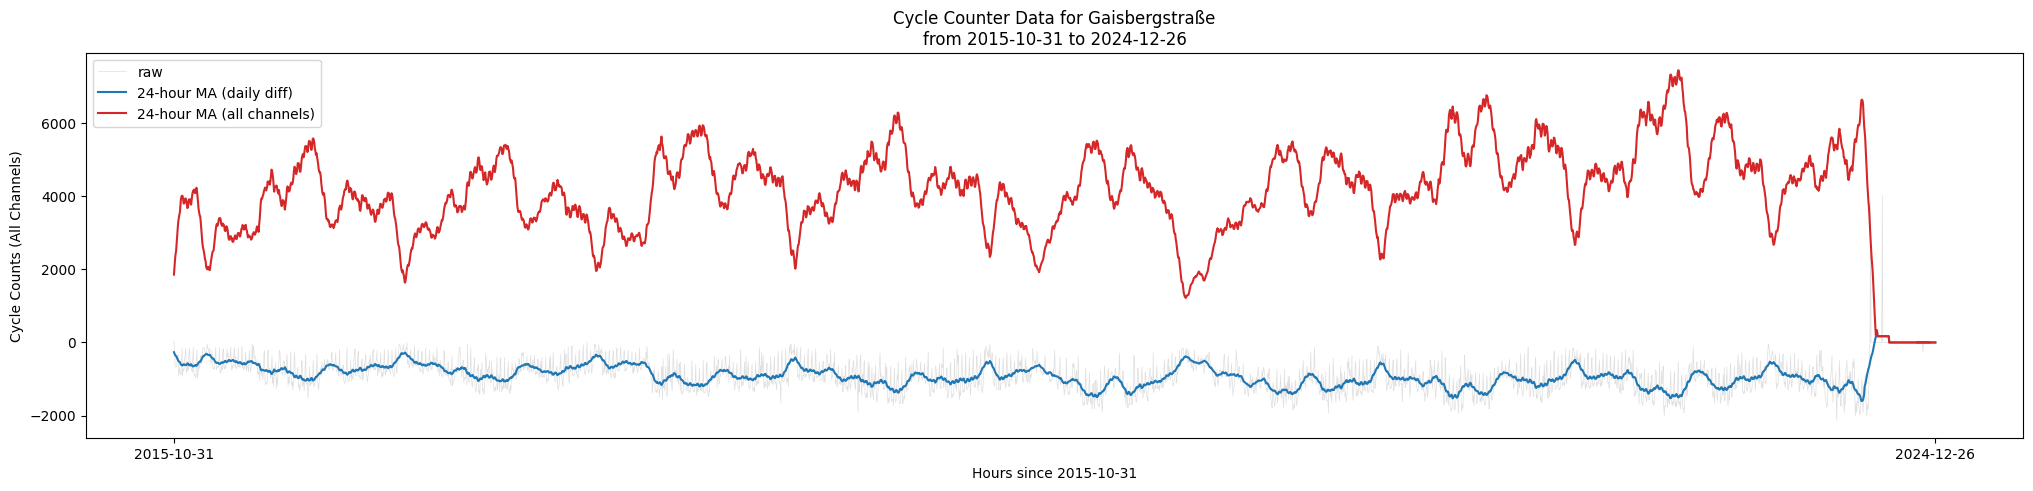

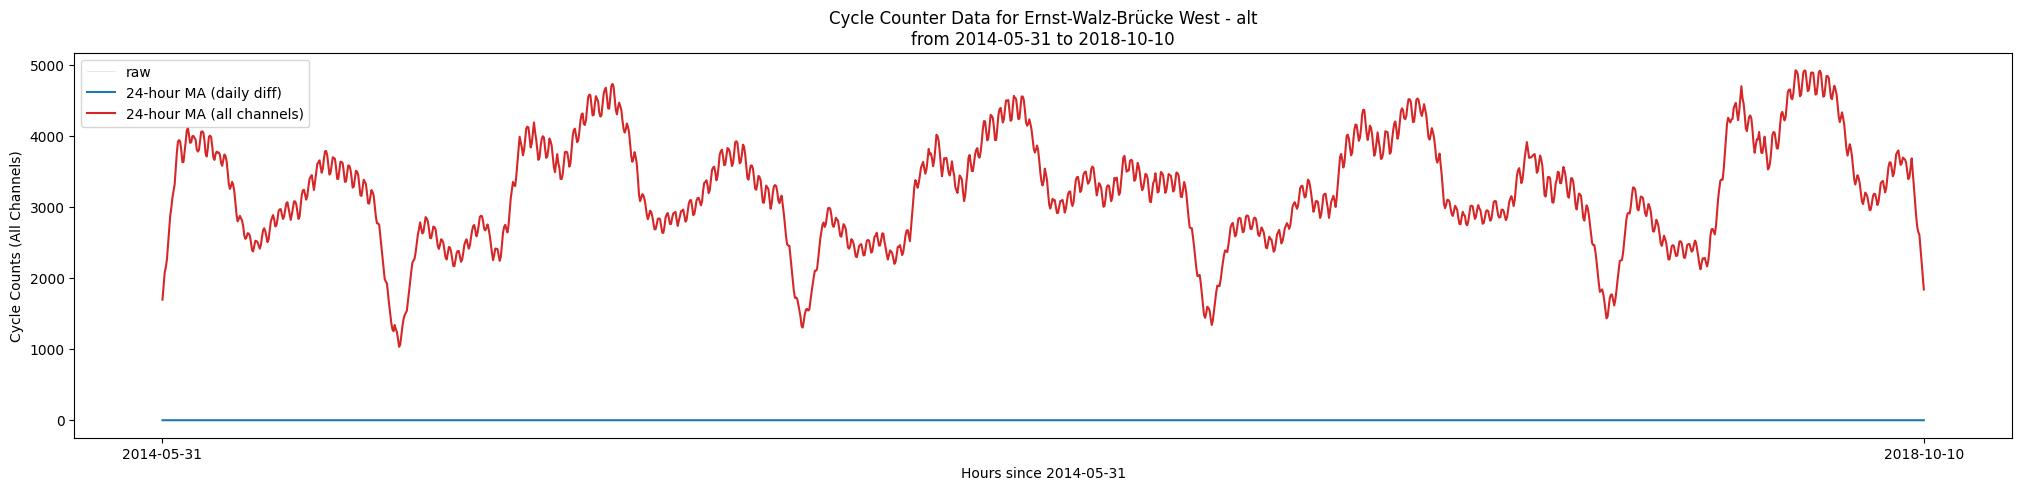

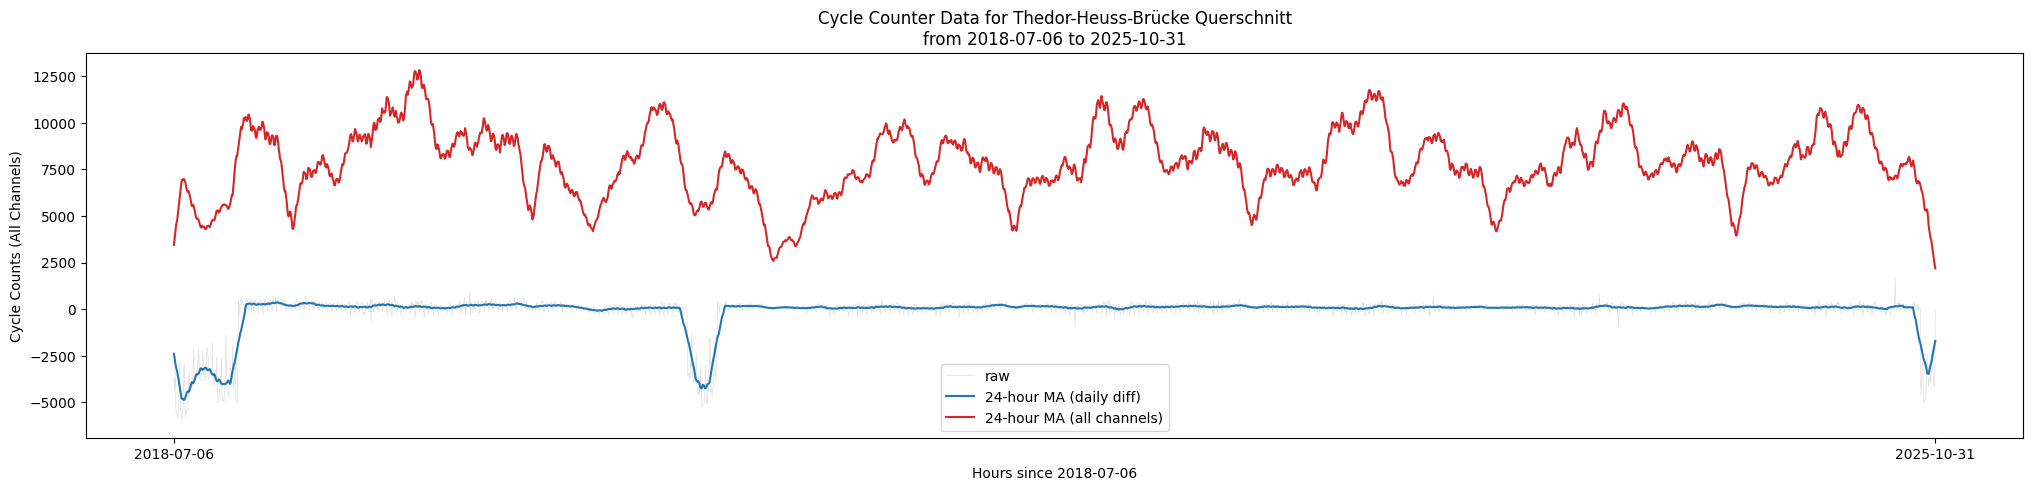

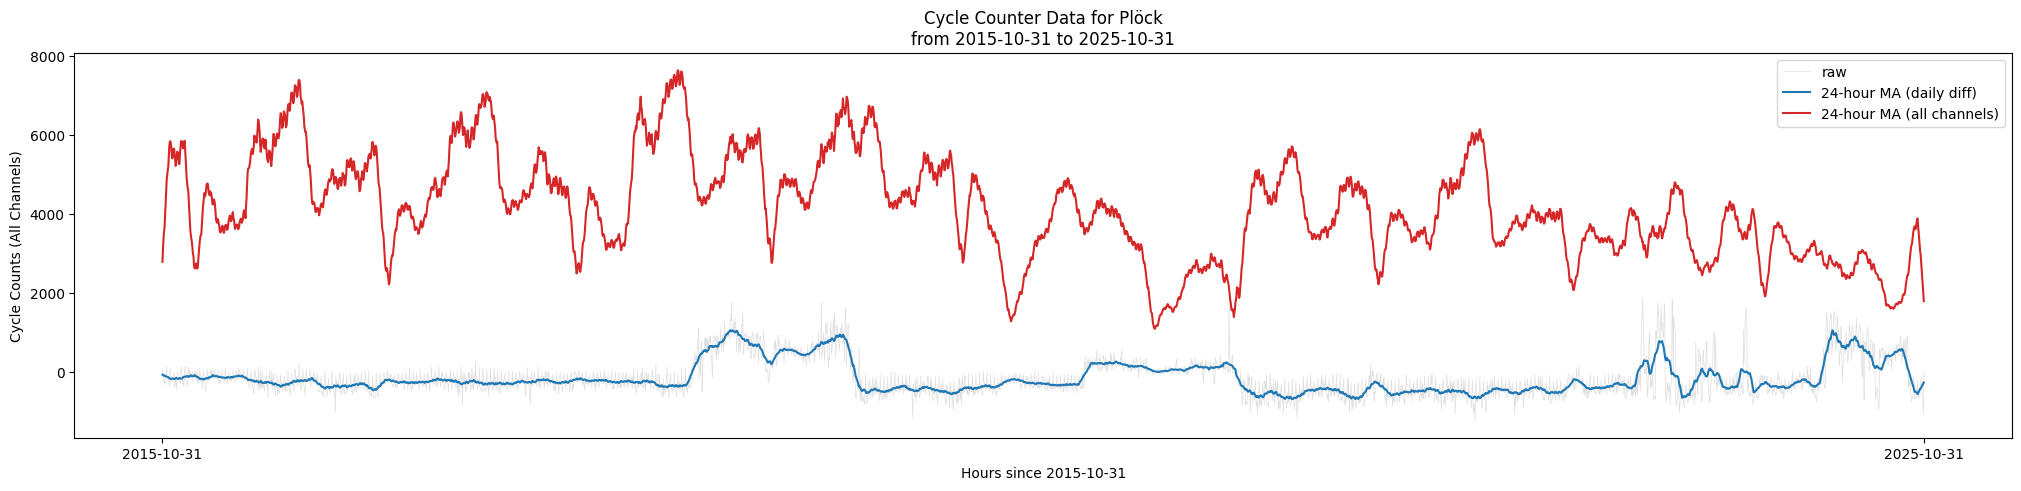

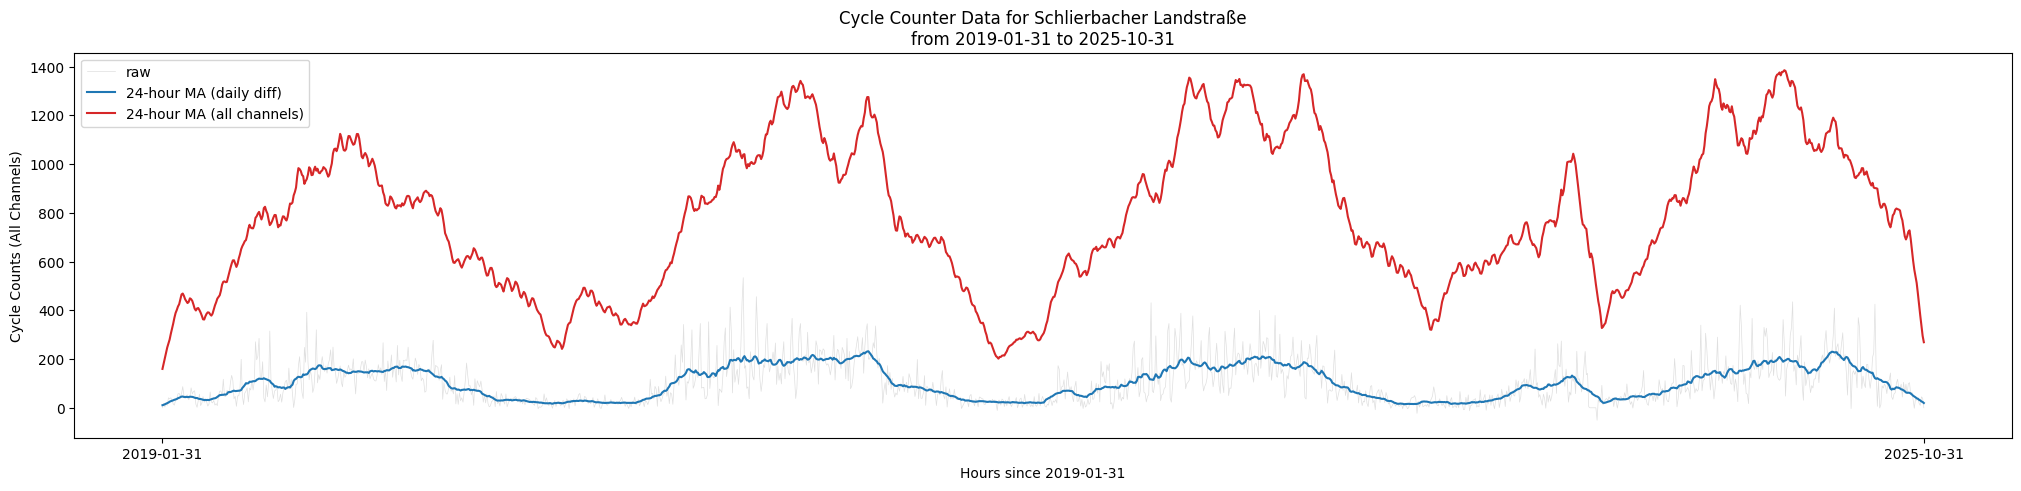

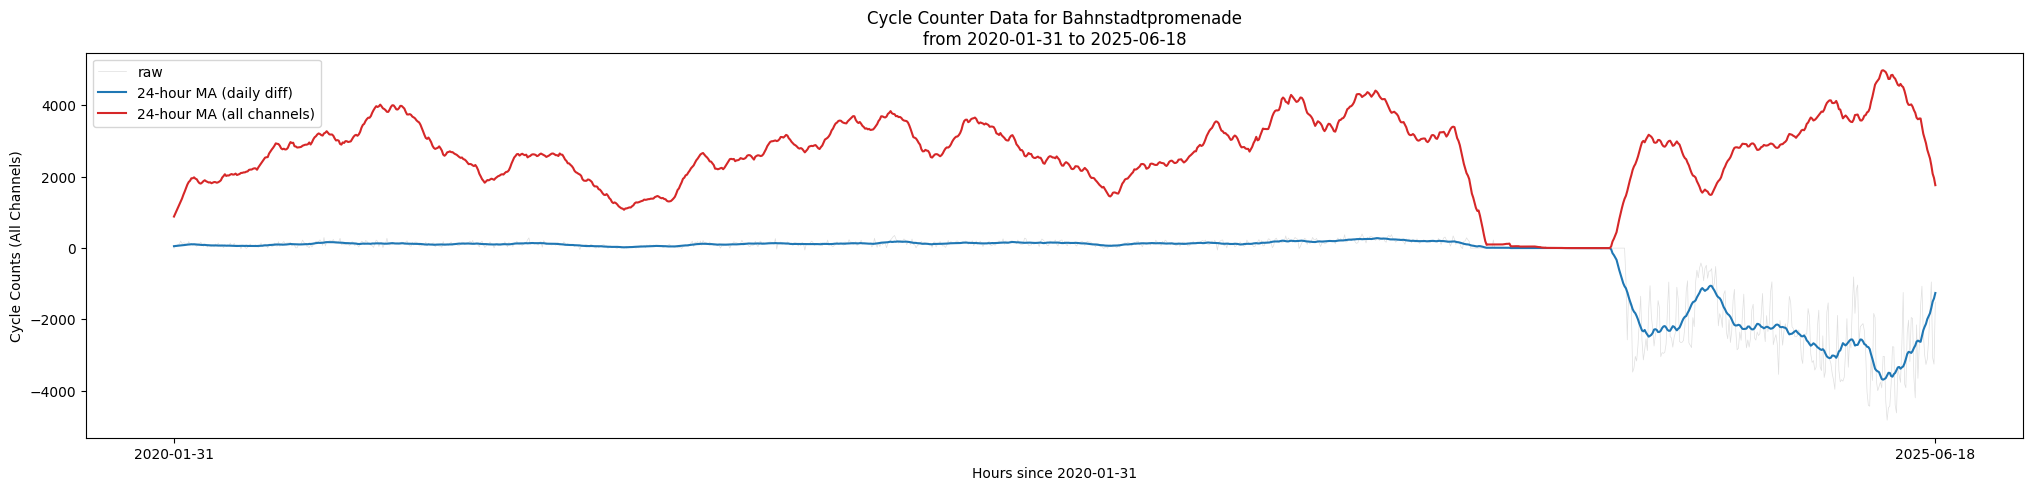

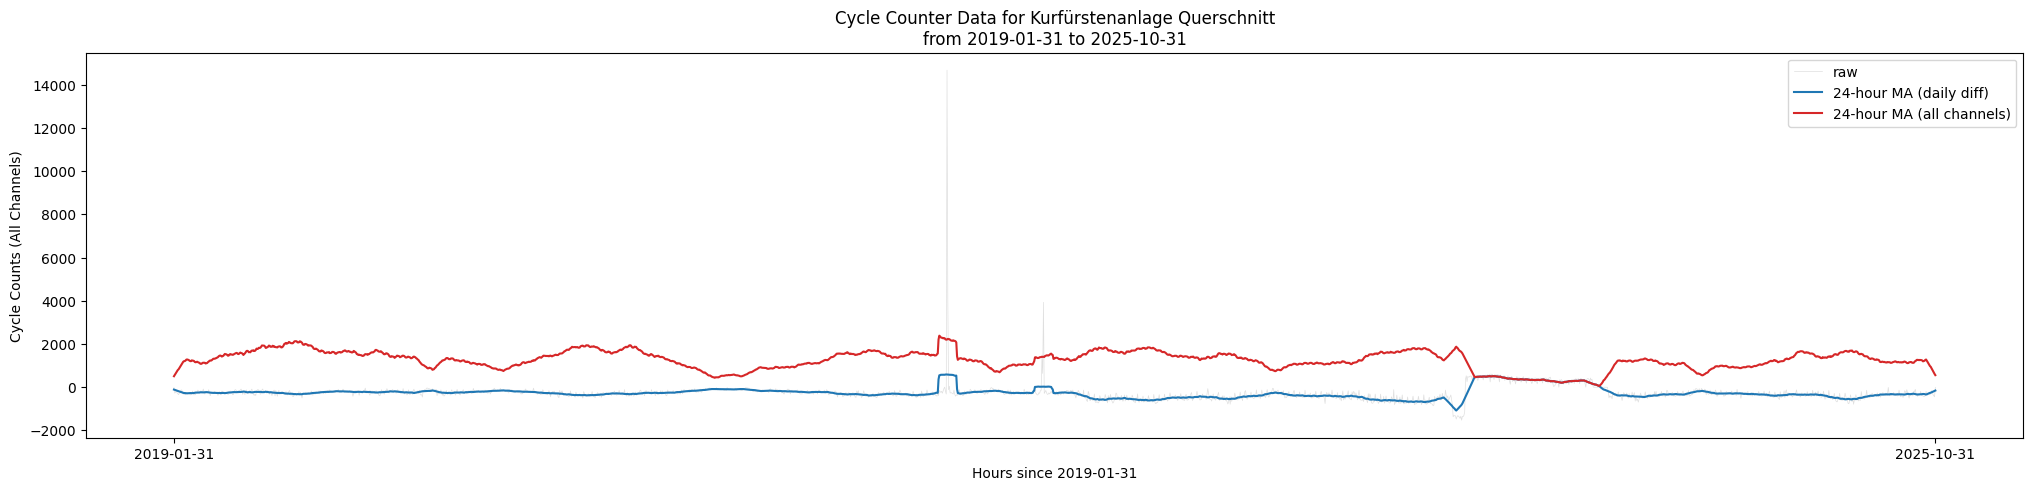

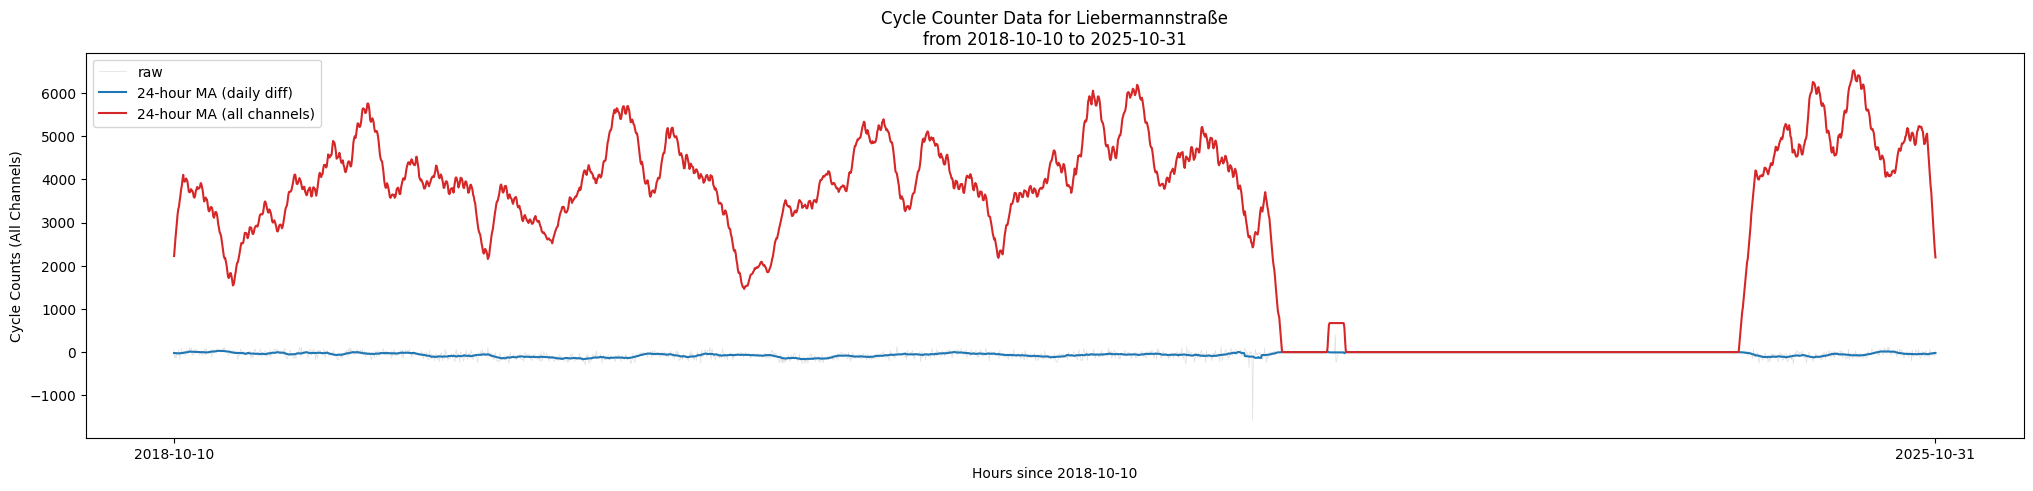

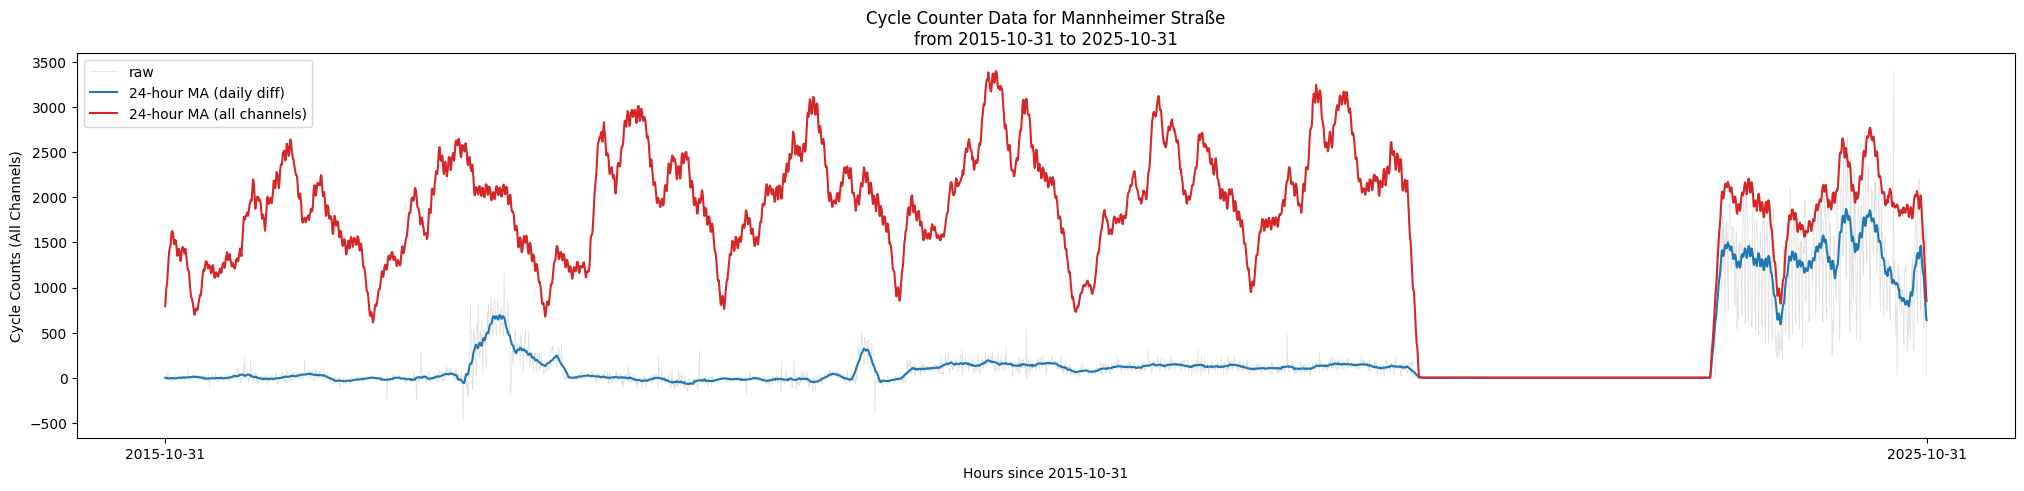

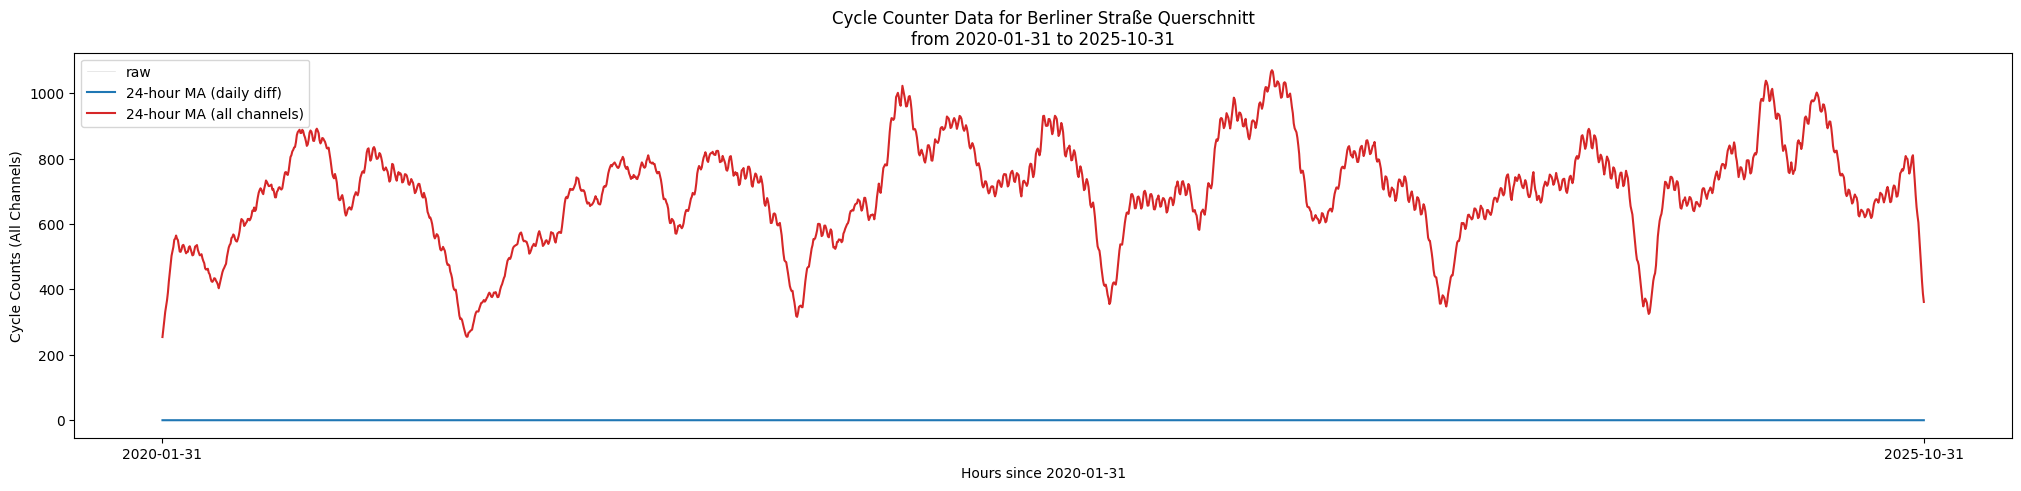

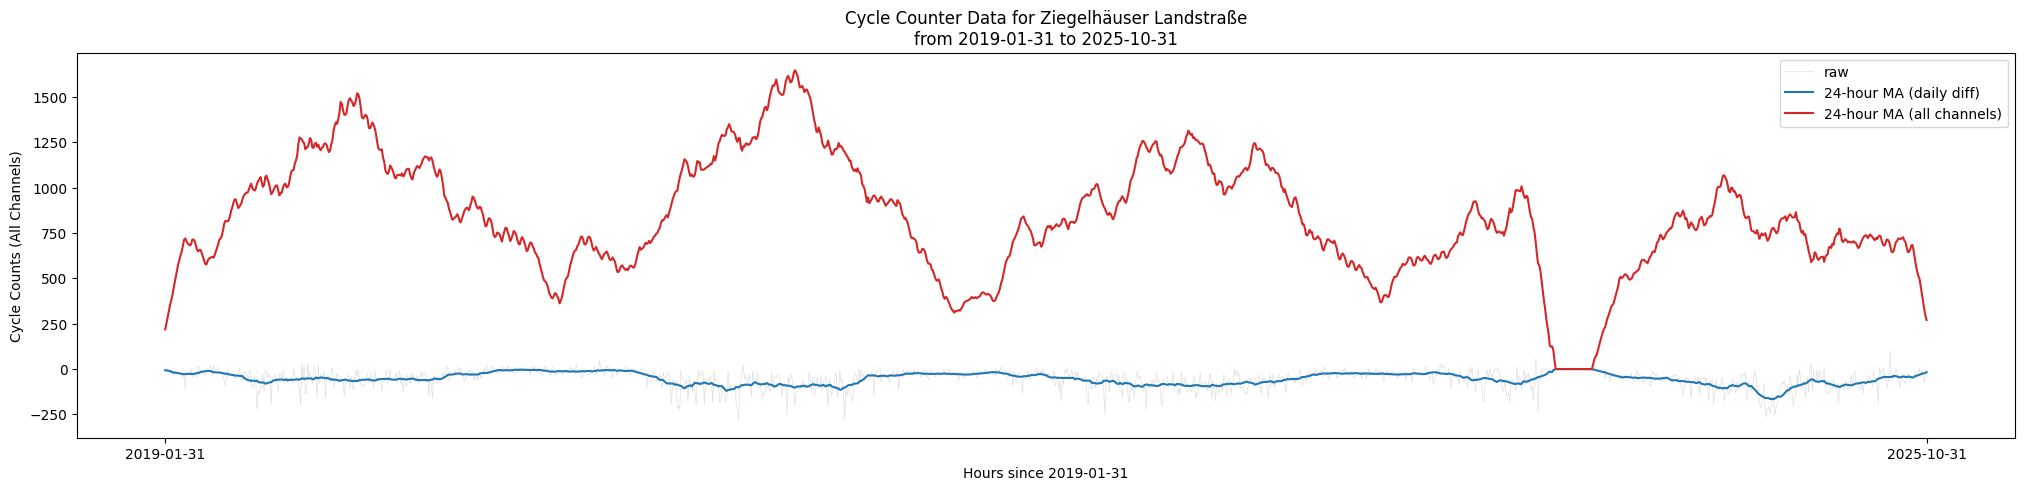

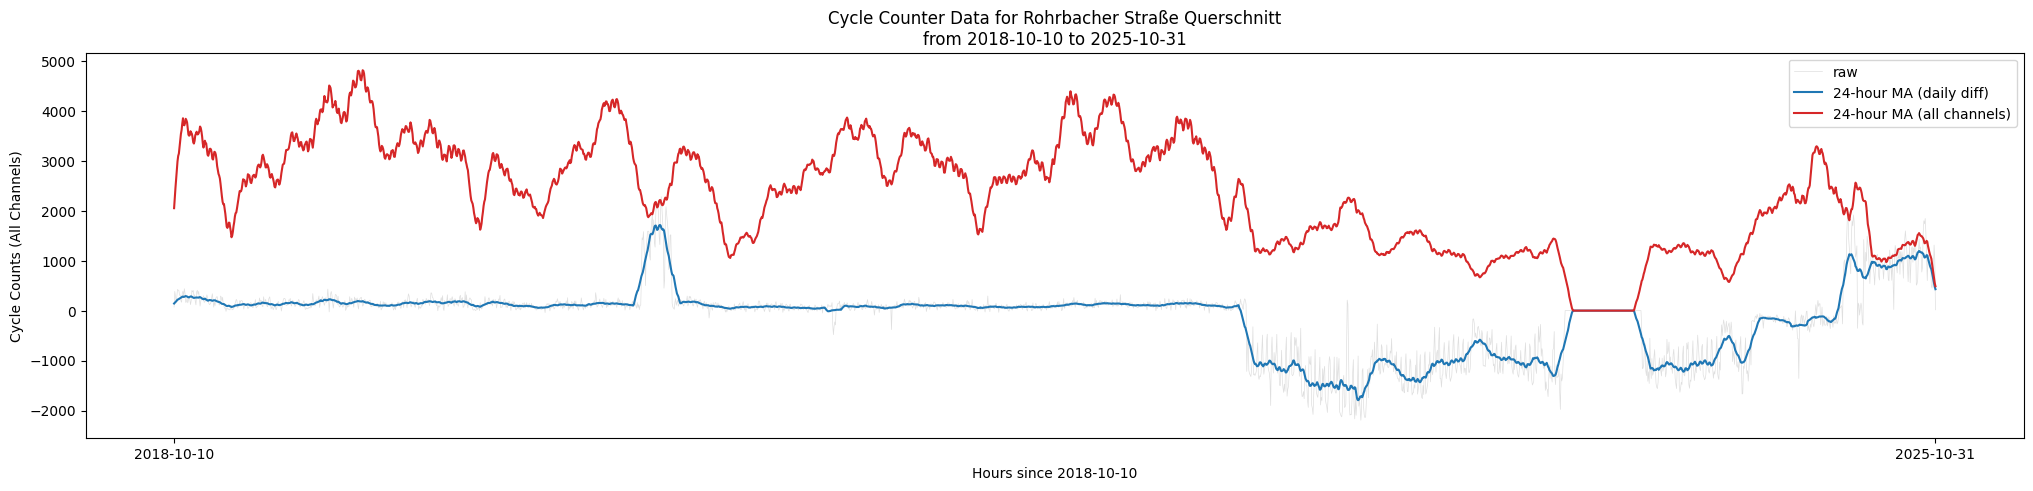

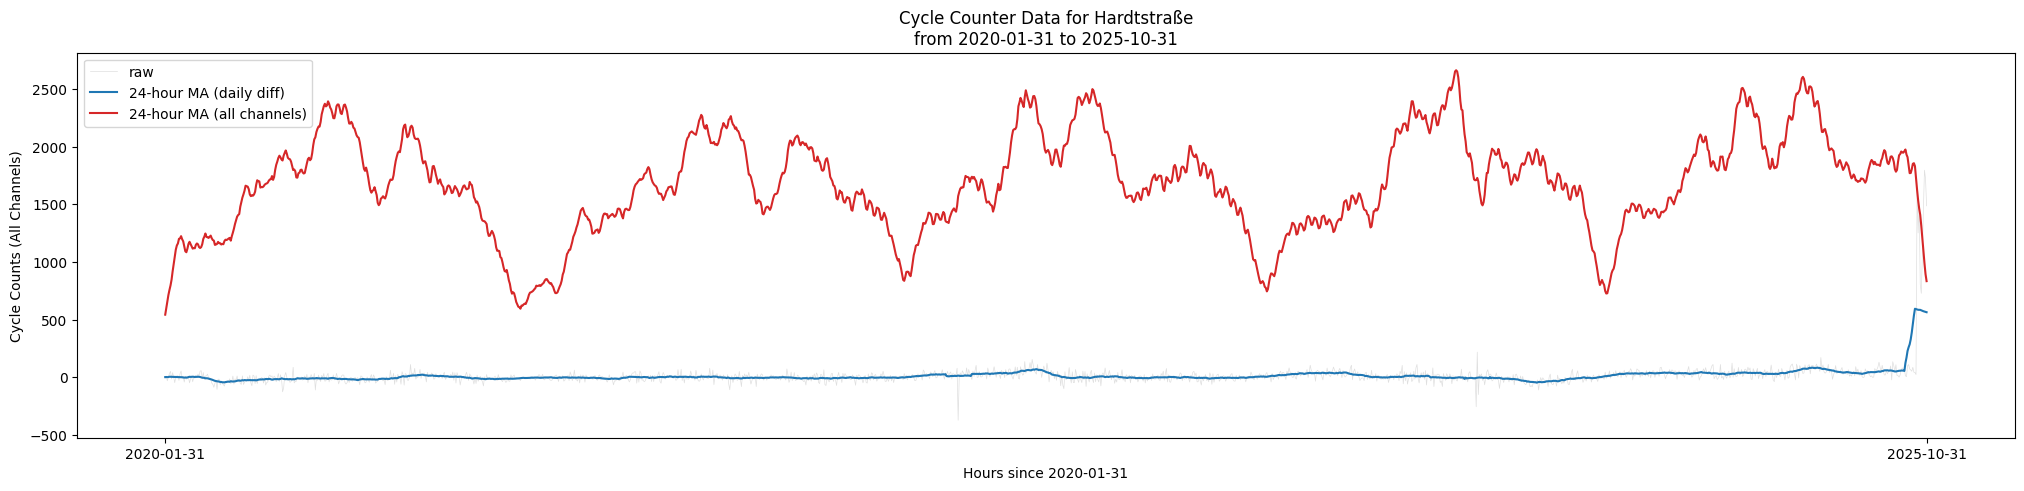

In [ ]:
for daily in dailys:
    station_name = daily.row(0, named=True)['counter_site']
    start_date = daily.row(0, named=True)['date'].strftime("%Y-%m-%d")
    end_date = daily.row(-1, named=True)['date'].strftime("%Y-%m-%d")
    data = daily.select('daily_diff').to_series().to_numpy()

    n = len(data)
    x = np.arange(n)

    # smoothing window: 24 hours if available, otherwise a small window
    window = 24 if n >= 24 else max(3, n // 10)
    smoothed = np.convolve(data, np.ones(window) / window, mode='same')

    smoothed_all = np.convolve(daily.select('channels_all_daily').to_series().to_numpy(), np.ones(window) /window, mode='same')

    plt.figure(figsize=(25, 5))
    plt.plot(x, data, color='gray', alpha=0.25, linewidth=0.5, label='raw')
    plt.plot(x, smoothed, color='tab:blue', linewidth=1.5, label=f'{window}-hour MA (daily diff [in-out])')
    plt.plot(x, smoothed_all, color='tab:red', linewidth=1.5, label=f'{window}-hour MA (all channels [in+out])')
    # show only start and end on x-axis (positions 0 and last index)
    plt.xticks([0, max(n - 1, 0)], [start_date, end_date])
    plt.title(f'Cycle Counter Data for {station_name}\nfrom {start_date} to {end_date}')
    plt.xlabel('Hours since ' + start_date)
    plt.ylabel('Cycle Counts (All Channels)')
    plt.legend()
    plt.show()